## 군집화 실습
- 고객 세그먼테이션 (Custoemr Segmentation)

고객 세그먼테이션
- 다양한 기준으로 고객을 분류하는 기법
- CRM(Customer Relationship Management)이나 마케팅의 중요 기반 요소

고객 분류 요소
- 개인 신상 데이터 기반 : 지역 / 결혼 여부 / 성별 / 소득 등
- 상품 구매 정보 기반 : (기업 입장에서는) 더 중요한 분류 요소
    - 어떤 상품을
    - 얼마나 많은 비용을 들여서
    - 얼마나 자주 구매하는가
- 얼마나 많은 매출을 발생시키느냐가
- 고객 기준을정하는 중요한 요소

고객 세그먼테이션의 주요 목표 : 타깃 마케팅
    
    
타깃 마케팅
- 고객을 여러 특성에 맞게 세분화해서
- 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것
- 고객의 상품 구매 이력에서 출발

고객 세그먼테이션 군집화
- 고객의 어떤 요소를 기반으로 군집화할 것인가를 결정하는 것이 중요
- 예제 : 기본적인 고객 분석 요소인 FRM 기법 이용

FRM 기법
- Recency(R) : 가장 최근 상품 구입일에서 오늘까지의 기간
- Frequency(F) : 상품 구매 횟수
- Monetary Value(M) : 총 구매 금액

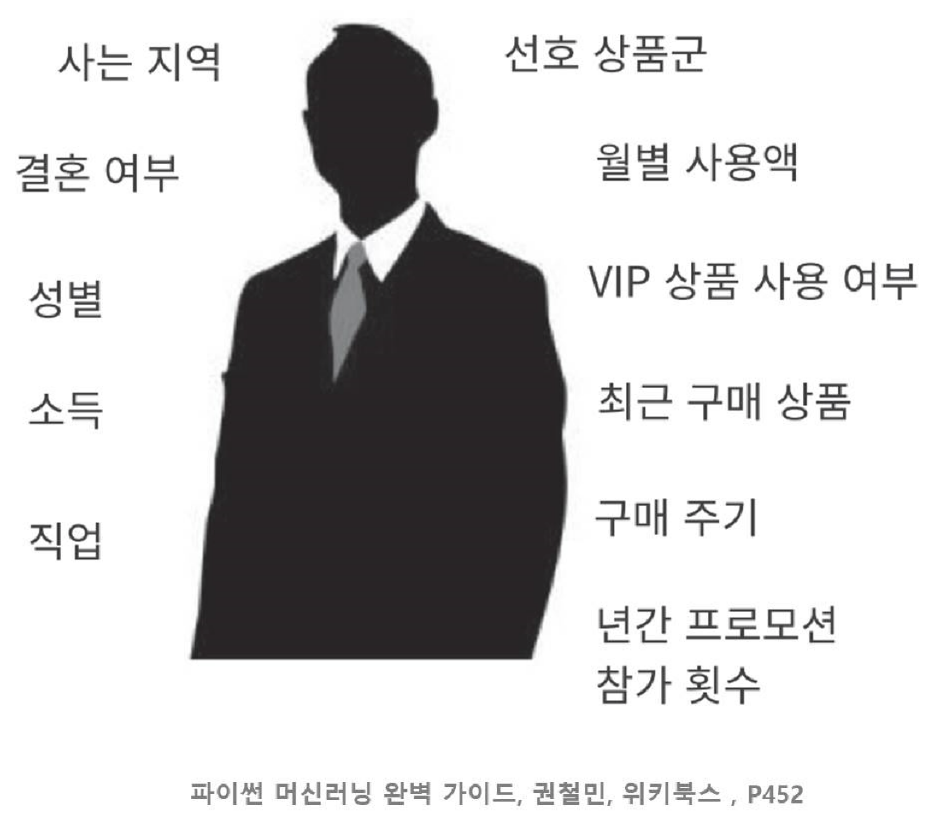

### 고객 세그먼테이션 예제 
- 온라인 판매 데이터를 기반으로  
    - 고객 세그먼테이션을 군집화 기반으로 수행  

사용 데이터 
- UCI : Machine Learning Repository에서 다운로드
- http://archive.ics.uci.edu/ml/datasets/online+retail
- Datasets 
- Online Retail.xslx
- 제품 주문 데이터 세트  

### 고객 세그먼테이션 군집화 과정

데이터 세트 로딩과 데이터 클린징
- 반품이나 CustomerID가 Null인 데이터는 제외
- 영국 이외 국가의 데이터는 제외

RFM 기반 데이터 가공
- 구매금액 데이터 생성 생성
- 고객 기준으로 Recency, Frequency, Monetary 가공  

RFM 기반 고객 세그먼테이션
- Recency, Frequency, Monetary 값의 분포도 확인  
- K-Means로 군집화 수행 후에 실루엣 계수 평가  
- K-Means 군집화 후에 실루엣 계수 및 군집을 시각화  
- 로그 변환 후 재 시각화  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 세트 로딩과 전처리 작업

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel('../data/Online Retail.xlsx')
retail_df.head()
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# 주문번호, 제품코드, 설명, 주문수량, 주문일자, 제품단가, 고객번호, 주문고객국가
# 식별자 : 주문번호 + 제품코드 i.e. InvoiceNo + StockCode

In [5]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


min이 -80995이고 max가 80995는 뭔가 좀 그렇다

In [6]:
len(retail_df[retail_df['Quantity'] < 0])

10624

음수인 주문수량이 10624개다

In [7]:
len(retail_df[retail_df['UnitPrice'] < 0])

2

제품단가가 음수인건 2개밖에 없긴 하다

### 전처리 작업 필요

CustomerID   
- 고객 세그먼테이션을 수행하므로  
- 고객 식별 번호가 없는 데이터는 필요 없으므로  
- null 값인 경우 삭제  

Quantity와 UnitPrice에 음수값 존재 (반환)  
- 양수값만 사용

#### 음수값, CustomerID가 Null인 데이터, 영국 이외의 국가 데이터는 제외

In [8]:
# 영국만 추출
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
retail_df.shape

(495478, 8)

In [9]:
# 주문수량 음수 제거
retail_df.drop(retail_df[retail_df['Quantity'] < 0].index, inplace=True)
retail_df.drop(retail_df[retail_df['UnitPrice'] < 0].index, inplace=True)
retail_df.shape

(486284, 8)

In [10]:
# Null 제거
retail_df.dropna(inplace=True)
retail_df.shape

(354345, 8)

### RFM 기반 데이터 가공

- 고객 세그먼테이션 군집화를 RFM 기반으로 수행하는 데 필요한 데이터 가공  
- Recency, Frequency, Monetary  

In [11]:
# 주문금액 추가
retail_df['SaleAmount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  int64         
 7   Country      354345 non-null  object        
 8   SaleAmount   354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 27.0+ MB


In [13]:
# 주문건수 순위
retail_df['CustomerID'].value_counts(ascending=False)

CustomerID
17841    7847
14096    5111
12748    4596
14606    2700
15311    2379
         ... 
14351       1
13270       1
15562       1
15389       1
17956       1
Name: count, Length: 3921, dtype: int64

### 식별자 확인
- 식별자 확인 : InvoiceNo + StockCode
    - InvoiceNo StockCode
    - 536365    85123A
    - 536365    71053
    - 536365    84406B
- 전형적인 판매 데이터 세트와 같이 
     - 주문번호(InvoiceNo) + 상품코드(StockCode)가 식별자로 되어 있음
     - InvoiceNo + StockCode로 그룹화 수행하면 거의 유일한 식별자 레벨이 될 수 있음  
        - 개수의 평균이 1에 가까운 수치로 나옴  

In [14]:
identifier = retail_df.value_counts(['InvoiceNo', 'StockCode'])
identifier[identifier>1]

InvoiceNo  StockCode
555524     22698        20
           22697        12
572861     22775         8
578289     23395         7
572344     M             7
                        ..
576463     22457         2
572312     23356         2
546742     M             2
560223     23206         2
565329     21900         2
Name: count, Length: 8973, dtype: int64

### RFM 기반의 고객 세그먼테이션 수행 방향
- 지금 수행하려는 RFM 기반의 고객 세그먼테이션은
    - 고객 레벨로 주문기간, 주문횟수, 주문금액 데이터를 기반으로 해서  
    - 세그먼테이션 수행  

    - 따라서 주문번호+제품코드 기준의 데이터를 
        - 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경 필요 

    --> 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 Group By 수행    
        - 현재의 retail_df 데이터 프레임에 CustomerID로 Group By를 해서  
        - CustomerID 기준으로 데이터 프레임 새로 생성  
---
- 그런데 DataFrame의 groupby()만 사용해서   
- 여러 개의 칼럼에 서로 다른 aggregation(count(), max(), sum()) 연산을 한 번에 수행하기 어려움  
- DataFrame의 groupby()의 multiple 연산을 위해 agg() 사용  

In [15]:
aggregations = {
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'SaleAmount':'sum'
}
# 각 고객마다 묶어서 각 칼럼에 각 연산을 적용하기
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
cust_df.head()

,InvoiceDate,InvoiceNo,SaleAmount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4596,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [16]:
# 컬럼명 바꾸어주기
cust_df = cust_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','SaleAmount':'Monetary'})
cust_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4596,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [17]:
# 인덱스 초기화및 기존 인덱스 데이터를 컬럼으로 추가
cust_df = cust_df.reset_index()
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4596,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


### Recency를 날짜에서 정수형으로 가공
- 온라인 판매기간을 기준으로 가장 최근 주문일로부터 얼마나 지났는지를 계산하여 필드 생성  
- Recency = 오늘 날짜 - 가장 최근 주문일  
- 온라인 판매 데이터 판매 기간 확인  
- 2010-12-01 ~ 2011-12-09  
- 따라서 오늘은 하루 더해서 2011-12-10로 설정  

In [18]:
# 현재 데이터는 그냥 최근 주문일이다
cust_df['Recency'].min()
cust_df['Recency'].max()

Timestamp('2010-12-01 09:53:00')

Timestamp('2011-12-09 12:49:00')

In [19]:
retail_df['InvoiceDate'].min()
retail_df['InvoiceDate'].max()

Timestamp('2010-12-01 08:26:00')

Timestamp('2011-12-09 12:49:00')

In [20]:
# 날짜 연산 라이브러리가 필요하다
import datetime as dt
dt.datetime(2011, 12, 10) - cust_df['Recency']

0      325 days 13:59:00
1        2 days 09:26:00
2        0 days 11:40:00
3        3 days 14:04:00
4        3 days 08:48:00
              ...       
3916   277 days 14:08:00
3917   180 days 13:07:00
3918     7 days 12:17:00
3919     3 days 11:58:00
3920    42 days 14:31:00
Name: Recency, Length: 3921, dtype: timedelta64[ns]

In [21]:
# 일수만 추출하여 정수변환하자
# 0이 나오기도 하니 1을 더함
cust_df['Recency'] = (dt.datetime(2011, 12, 10) - cust_df['Recency']).apply(lambda x: x.days + 1)
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4596,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


### RFM 기반 고객 세그먼테이션
- 고객 RFM 데이터 세트의 특성 확인하고  
- FRM 기반에서 고객 세그먼테이션 수행  

#### Recency, Frequency, Monetary 값의 분포도 확인

Text(0.5, 1.0, 'Recency Histogram')

(array([1702.,  728.,  331.,  215.,  208.,  179.,  170.,  153.,  120.,
         115.]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Frequency Histogram')

(array([3.895e+03, 1.800e+01, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 7.8560e+02, 1.5702e+03, 2.3548e+03, 3.1394e+03,
        3.9240e+03, 4.7086e+03, 5.4932e+03, 6.2778e+03, 7.0624e+03,
        7.8470e+03]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Monetary Histogram')

(array([3.888e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.  ,  25965.73,  51931.46,  77897.19, 103862.92, 129828.65,
        155794.38, 181760.11, 207725.84, 233691.57, 259657.3 ]),
 <BarContainer object of 10 artists>)

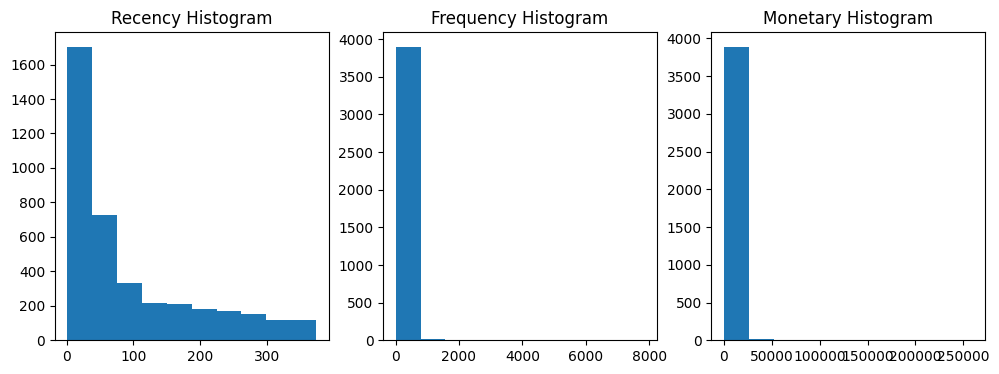

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

plt.show()

### 온라인 판매 데이터 세트 특징
- 개인 고객 주문 + 소매점 주문
- 소매점 주문이 개인 고객 주문과 매우 큰 차이가 있기 때문에
- 매우 왜곡된 데이터 분포를 가지게 되어
- 군집화가 한쪽 군집에만 집중되는 현상 발생
- 이처럼 왜곡된 데이터 분포에서 군집화를 수행할 때
- 어떤 현상이 발생하는지 확인

In [23]:
cust_df.describe()
# 왜곡이 좀 많다
# Frequency는 평균이 90인데 표준편차가 217인 위엄을 보인다
# Monetary의 경우 평균이 1863인데 75%의 값(상위 25%)이 1575이다
# 군집화... 해야겠지?

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,92.722265,90.371079,1863.910113
std,1576.823683,99.528532,217.796155,7481.922217
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.000000,18.000000,17.000000,300.040000
50%,15569.000000,51.000000,41.000000,651.820000
75%,16913.000000,143.000000,99.000000,1575.890000
max,18287.000000,374.000000,7847.000000,259657.300000


### 왜곡 정도가 매우 높은 데이터 세트에
- K-평균 군집을 적용하면  
    - 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행됨  

    - 그래서 먼저 평균과 표준편자 재조정한 뒤에 K-평균 수행  
        - (StandardScaler 사용해서 표준화해서 변환)   

### K-Means로 군집화 후에 실루엣 계수 평가
- (1) 왜곡정도가 심한 데이터를 그대로 사용할 경우  
- (2) 표준화 변환 수행후 군집화¶  

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### (1) 왜곡정도가 심한 데이터를 그대로 사용해서 실루엣 계수 확인

In [25]:
X_features = cust_df.iloc[:, 1:4] # Recency ~ Monetary 추출
X_features.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,3,103,4196.01
2,1,4596,33719.73
3,4,199,4090.88
4,4,59,942.34


In [26]:
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X_features)
cust_df['cluster_label1'] = kmeans.labels_
cust_df.head()

KMeans(n_clusters=2, n_init=10, random_state=0)

,CustomerID,Recency,Frequency,Monetary,cluster_label1
0,12346,326,1,77183.60,1
1,12747,3,103,4196.01,0
2,12748,1,4596,33719.73,0
3,12749,4,199,4090.88,0
4,12820,4,59,942.34,0


In [27]:
score_samples = silhouette_samples(X_features, cust_df['cluster_label1'])
score_samples[:10]

array([0.47644951, 0.96087402, 0.4358091 , 0.96194544, 0.98613106,
       0.98418469, 0.98618755, 0.98227974, 0.98619679, 0.98396053])

In [28]:
score_total = silhouette_score(X_features, cust_df['cluster_label1'])
score_total
# 스케일링 안했는데 스코어가 완전 높다
# 너무 한쪽으로만 치우쳐져 Overfitting이 발생한 모양이다

0.974568292048728

#### (2) 표준화 변환 수행후 군집화

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
StdSc = StandardScaler()
X_features_scaled = StdSc.fit_transform(cust_df.iloc[:, 1:4])
X_features_scaled[:5]

array([[ 2.34412669, -0.41039511, 10.06817422],
       [-0.90158778,  0.05799245,  0.31173771],
       [-0.92168508, 20.69000523,  4.25824834],
       [-0.89153913,  0.4988278 ,  0.29768472],
       [-0.89153913, -0.14405709, -0.12318862]])

In [31]:
kmeans = KMeans(n_clusters=2, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X_features_scaled)
cust_df['cluster_label2'] = kmeans.labels_
cust_df.head()

KMeans(n_clusters=2, n_init=10, random_state=0)

,CustomerID,Recency,Frequency,Monetary,cluster_label1,cluster_label2
0,12346,326,1,77183.60,1,1
1,12747,3,103,4196.01,0,0
2,12748,1,4596,33719.73,0,0
3,12749,4,199,4090.88,0,0
4,12820,4,59,942.34,0,0


In [32]:
score_samples = silhouette_samples(X_features_scaled, cust_df['cluster_label2'])
score_samples[:10]

array([0.02019114, 0.64074768, 0.02431567, 0.60429865, 0.67987412,
       0.67184558, 0.57056188, 0.51218847, 0.60031409, 0.68070114])

In [33]:
score_total = silhouette_score(X_features_scaled, cust_df['cluster_label2'])
score_total

0.5667612912416684

### K-Means 군집화 후에 실루엣 계수 및 군집을 시각화
- (1) 왜곡된 데이터인데 로그 변환 수행하지 않고 군집화 후 실루엣 계수 평가   
- (2) 로그 변환 수행하고 군집화 후 실루엣 계수 평가    

visualize_silhouette() 함수와 visualize_kmeans_plot_multi() 함수 사용

visualize_silhouette()
- 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때
- 개별 군집별 평균 실루엣 계수 값을 시각화하는 함수 (앞에서 사용했음)

visualize_kmeans_plot_multi() 
- 군집 개수별로 군집화 구성을 시각화하는 함수

#### (1) 왜곡된 데이터인데 로그 변환 수행하지 않고 군집화 후 실루엣 계수 평가  

In [34]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters=n_cluster, n_init=10, init='k-means++', max_iter=500, 
                           random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [35]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'd', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

### 실루엣 계수 / 군집화 그래프 출력
- (1) 표준화만 수행한 데이터 사용해서 군집화  
- (2) 로그 변환 수행 후 군집화 

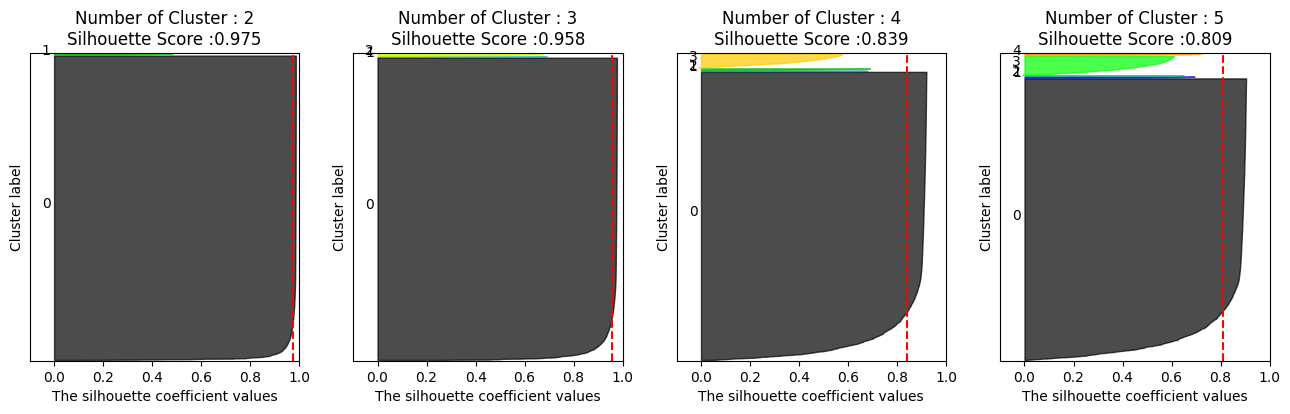

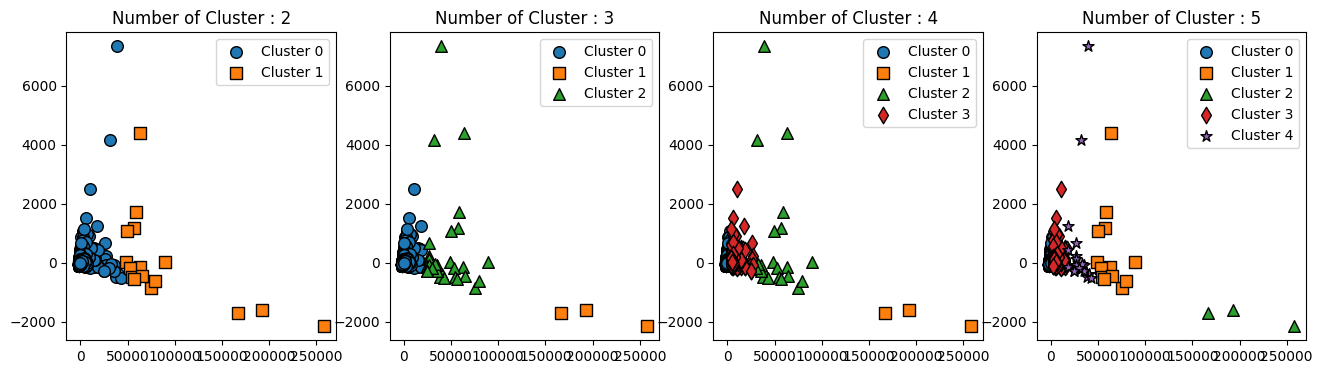

In [37]:
# 표준화 안하면 군집도 아주 왜곡된다
# 한 군집이 압도적인 모습을 보여준다
visualize_silhouette([2, 3, 4, 5], X_features)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features)

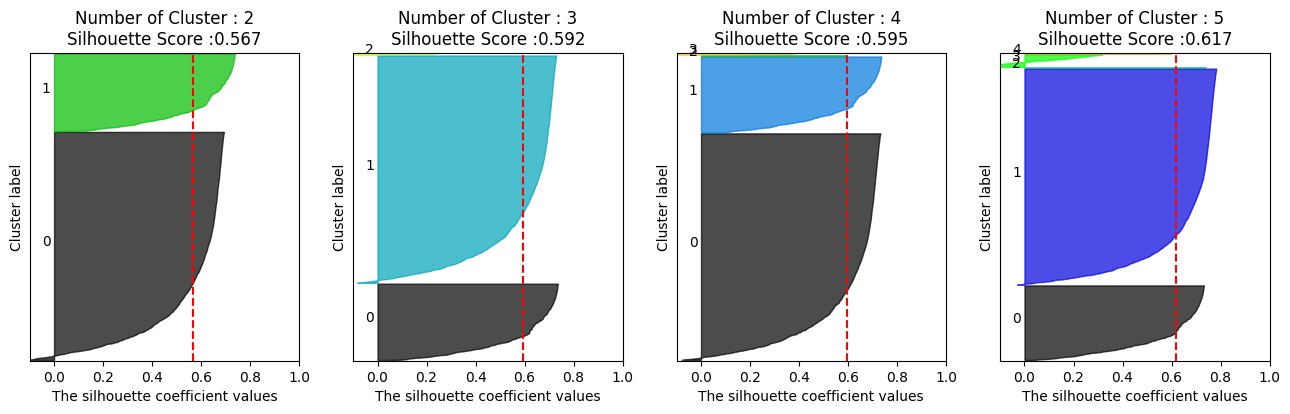

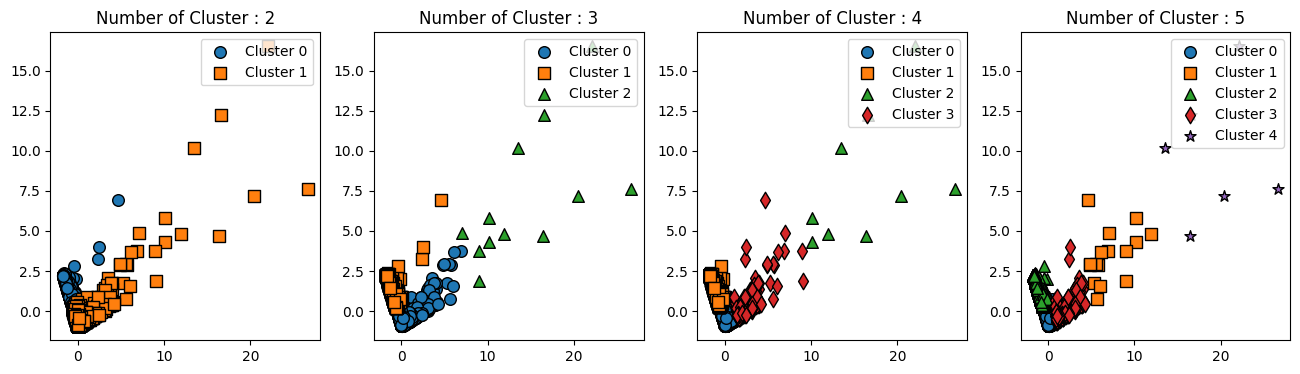

In [38]:
# 표준화 하니 좀 봐줄만 하다
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

### 왜곡된 데이터에 로그 변환 수행
 

### (2) 로그 변환 수행하고 군집화 후 실루엣 계수 평가
- 로그 변환 / StandardScale 수행 

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [39]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])
cust_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label1,cluster_label2,Recency_log,Frequency_log,Monetary_log
0,12346,326,1,77183.60,1,1,5.789960,0.693147,11.253955
1,12747,3,103,4196.01,0,0,1.386294,4.644391,8.342128
2,12748,1,4596,33719.73,0,0,0.693147,8.433159,10.425868
3,12749,4,199,4090.88,0,0,1.609438,5.298317,8.316760
4,12820,4,59,942.34,0,0,1.609438,4.094345,6.849427


In [47]:
StdSc = StandardScaler()
X_features_log_scaled = StdSc.fit_transform(cust_df.iloc[:, -3:])
X_features_log_scaled[:5]

# 이건 군집 3개임
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X_features_log_scaled)
cust_df['cluster_label3'] = kmeans.labels_

score_total = silhouette_score(X_features_log_scaled, cust_df['cluster_label3'])
score_total

array([[-2.4013806 ,  3.77442453,  0.89458118],
       [ 0.73268475,  1.44072456, -1.11784154],
       [ 3.7378771 ,  3.11074959, -1.11784154],
       [ 1.2513691 ,  1.42039337, -1.11784154],
       [ 0.29639651,  0.24439137, -1.11784154]])

KMeans(n_clusters=3, n_init=10, random_state=0)

0.491266607020892

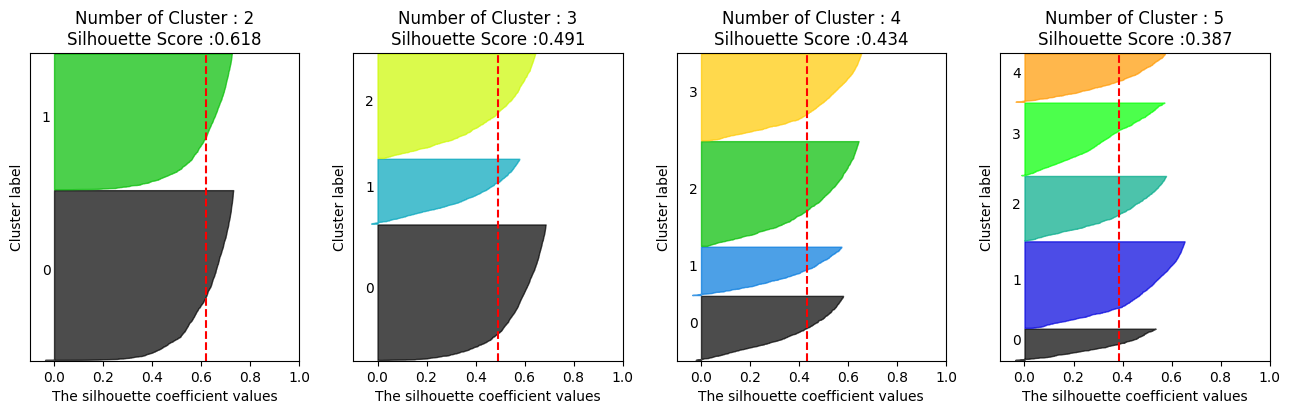

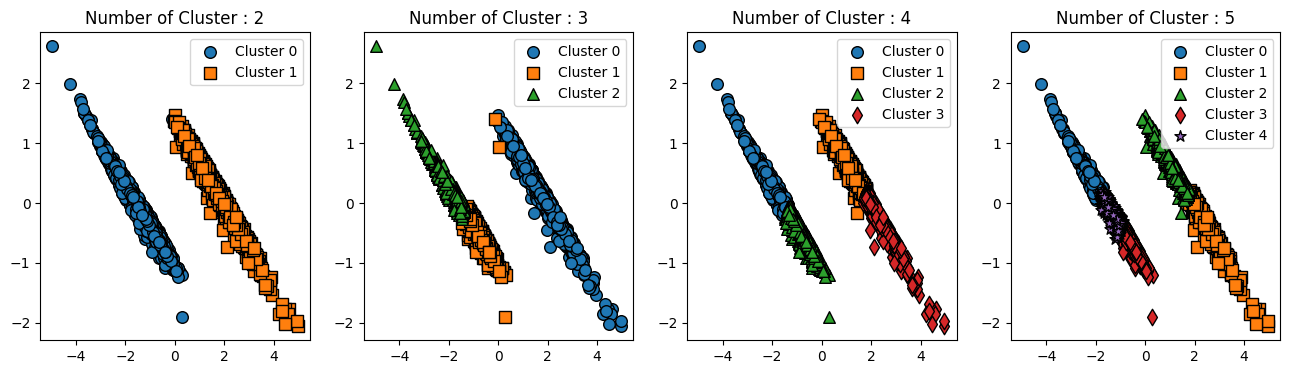

In [48]:
visualize_silhouette([2, 3, 4, 5], X_features_log_scaled)
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_log_scaled)

In [43]:
cust_df.head()

,CustomerID,Recency,Frequency,Monetary,cluster_label1,cluster_label2,Recency_log,Frequency_log,Monetary_log,cluster_label3
0,12346,326,1,77183.60,1,1,5.789960,0.693147,11.253955,1
1,12747,3,103,4196.01,0,0,1.386294,4.644391,8.342128,0
2,12748,1,4596,33719.73,0,0,0.693147,8.433159,10.425868,0
3,12749,4,199,4090.88,0,0,1.609438,5.298317,8.316760,0
4,12820,4,59,942.34,0,0,1.609438,4.094345,6.849427,0


In [49]:
cust_df.value_counts('cluster_label3')

cluster_label3
0    1743
2    1343
1     835
Name: count, dtype: int64

In [50]:
cluster0max = cust_df[cust_df['cluster_label3']==0]['Monetary'].max()
cluster0max

259657.3

In [51]:
cluster1max = cust_df[cust_df['cluster_label3']==1]['Monetary'].max()
cluster1max

3096.0

In [52]:
cluster2max = cust_df[cust_df['cluster_label3']==2]['Monetary'].max()
cluster2max

77183.6

데이터 분석 도메인
- 특정 분야의 전문화된 지식. 데이터가 발생한 환경에 관한 지식  
- 데이터 사이언스를 통해서 해결하고자 하는 문제가 속한 업계, 산업에 대한 전문성을 의미
  - 예 : 병원 데이터 : 도메인 병원 관련 지식 
- 도메인 지식이 있는 사람들을 해당 분야의 전문가로 간주

- 우리의 경우 전문가라고 할 수는 없지만
- 데이터 분석할 때 주어진 데이터의 도메인을 해석하려고 노력은 해야 함


- 예로 상품 판매 데이터를 분석하려고 하면
  - 당연히 상품에 관련 데이터를 확인하고
  - 고객 데이터도 분석하고
  - 관련 매출 관련 행태도 분석해야 함
- 이런 것들을 좀 더 관찰하고 분석할 때
- 도메인 지식을 얻을 수 있음 

- 도메인 지식 예
  - 고객 
    - 성별, 나이, 거주지, 직업
    - 소득, 신용도, 계정 등 
    
  - 상품 
    - 가격, 특성
    
  - 주문
    - 주문 건수, 주문 금액, 평균 구매액, 구매 주기, 최근 구매 여부 등 
    
- 이러한 정보들을 확인하고
- 이러한 정보들이 주어져 있지 않다면 
- 가공해서 추출 